ДЗ
====
1. Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

2. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [3]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Война и Мир
-----

In [5]:
text = ''
for i in range(1,5):    
    with open(f'war_and_peace/tom_{i}.txt', 'r',  encoding='utf-8') as f:
        tom = f.read().lower()
        tom = re.sub(r'[^а-я ]','', tom)
    text += tom 

Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей.

In [12]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [13]:
POS['к']

11

In [14]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [15]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [16]:
pd.DataFrame(probabilities)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,37.0,1648.0,8869.0,2263.0,5139.0,2576.0,0.0,3156.0,10687.0,350.0,...,2014.0,3461.0,636.0,0.0,0.0,0.0,8.0,2051.0,6431.0,44828.0
1,2609.0,24.0,216.0,27.0,61.0,5675.0,0.0,19.0,2.0,1947.0,...,55.0,12.0,538.0,271.0,10897.0,100.0,1.0,11.0,1172.0,596.0
2,14789.0,46.0,111.0,104.0,834.0,11882.0,0.0,3.0,1333.0,8406.0,...,108.0,3195.0,11.0,36.0,6787.0,440.0,1.0,2.0,552.0,17380.0
3,2546.0,0.0,107.0,3.0,2824.0,1391.0,0.0,3.0,4.0,1948.0,...,74.0,19.0,0.0,0.0,3.0,5.0,0.0,9.0,3.0,2117.0
4,11649.0,88.0,2622.0,21.0,74.0,12048.0,0.0,38.0,7.0,6749.0,...,88.0,331.0,1.0,462.0,1650.0,1076.0,2.0,116.0,1139.0,2950.0
5,91.0,3036.0,4069.0,9310.0,7045.0,4395.0,0.0,2835.0,3263.0,515.0,...,2549.0,1819.0,1637.0,0.0,0.0,0.0,4.0,727.0,962.0,45468.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3653.0,145.0,0.0,36.0,1995.0,10062.0,0.0,51.0,0.0,3704.0,...,109.0,0.0,0.0,0.0,0.0,110.0,1.0,77.0,0.0,537.0
8,14083.0,463.0,2118.0,1054.0,1805.0,633.0,0.0,430.0,196.0,931.0,...,42.0,27.0,0.0,42.0,1499.0,1603.0,0.0,181.0,1252.0,3433.0
9,228.0,1142.0,6748.0,1341.0,4176.0,7303.0,0.0,1056.0,5279.0,2241.0,...,3357.0,939.0,382.0,0.0,0.0,1.0,8.0,941.0,4974.0,51696.0


In [18]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [19]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

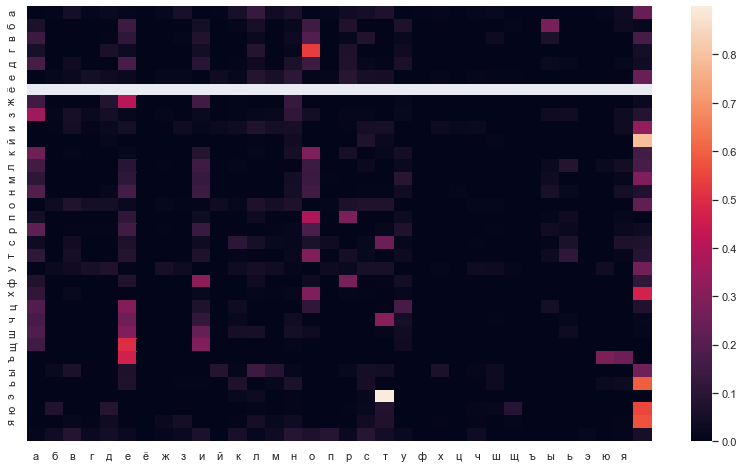

In [20]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 

In [22]:
def cal_string_proba(string):
    proba = 1.0 / len(RUSSIAN)
    for cp, cn in zip(string[1:], string[:-1]):
        proba *= probabilities[POS[cp], POS[cn]]
    return proba

In [24]:
cal_string_proba('лев')

0.0002844875836196992

In [30]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
sum_prob = 0
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
            sum_prob += proba
            print(''.join(['п', c, d, 'р']), proba)

паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2095790878783555e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.840852058790128e-06
палр 3.3611556905914123e-09
памр 1.0930948458598652e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.531903526415092e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
па р 8.697598650738777e-06
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.685575343020761e-10
пвер 5.0598785244545456e-09
пвжр 3.909391636356634e-15
пвзр 8.485947199

In [34]:
print('вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р =',sum_prob)

вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р = 0.0009492043385122807


Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [65]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length-1):
    index = POS[s[i]]
    next_char = ' '
    while next_char == ' ':
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

быликано


HMM
-----
Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [67]:
from hmmlearn.hmm import GaussianHMM

In [75]:
series = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")["Count"]

In [76]:
values = series.values.reshape(-1,1)

In [147]:
scores_list = []
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))
    scores_list.append((n, model.score(values)))

1 -739.512376545524
2 -652.7824661820222
3 -629.4670322744719
4 -593.9630465273635
5 -577.8593153999477
6 -571.3182247583841
7 -561.1297217988867
8 -557.2521338484629


Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 118 data points will result in a degenerate solution.


9 -554.9665273071909
10 -548.567610540732


Fitting a model with 167 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 118 data points will result in a degenerate solution.


11 -546.7890717086478
12 -541.5542512045533


Fitting a model with 223 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 118 data points will result in a degenerate solution.


13 -535.8293214067103
14 -530.8640433083143


Fitting a model with 287 free scalar parameters with only 118 data points will result in a degenerate solution.


15 -525.4667538338567


Fitting a model with 322 free scalar parameters with only 118 data points will result in a degenerate solution.


16 -521.8047703318052


Fitting a model with 359 free scalar parameters with only 118 data points will result in a degenerate solution.


17 -519.9460958536666


Fitting a model with 398 free scalar parameters with only 118 data points will result in a degenerate solution.


18 -507.8428117932861
19 -507.6503852251214


Fitting a model with 398 free scalar parameters with only 118 data points will result in a degenerate solution.


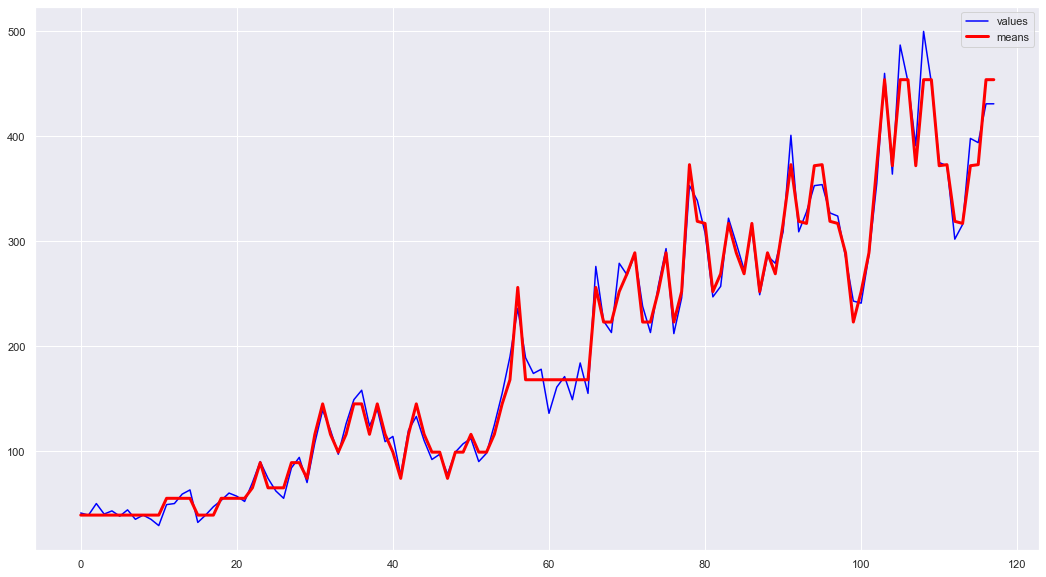

In [148]:
model = GaussianHMM(n_components=19,
                    covariance_type="diag",
                    n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(18, 10))
plt.plot(values, color='blue', label='values')
plt.plot(means, linewidth=3, color='red', label='means')
plt.legend()

In [149]:
last_value = labels[-1]
prediction = []
for i in range(20):
    last_value = np.random.choice(19, p=model.transmat_[last_value])
    prediction.append(model.means_[last_value])

In [150]:
predict_series = np.concatenate((values, prediction))

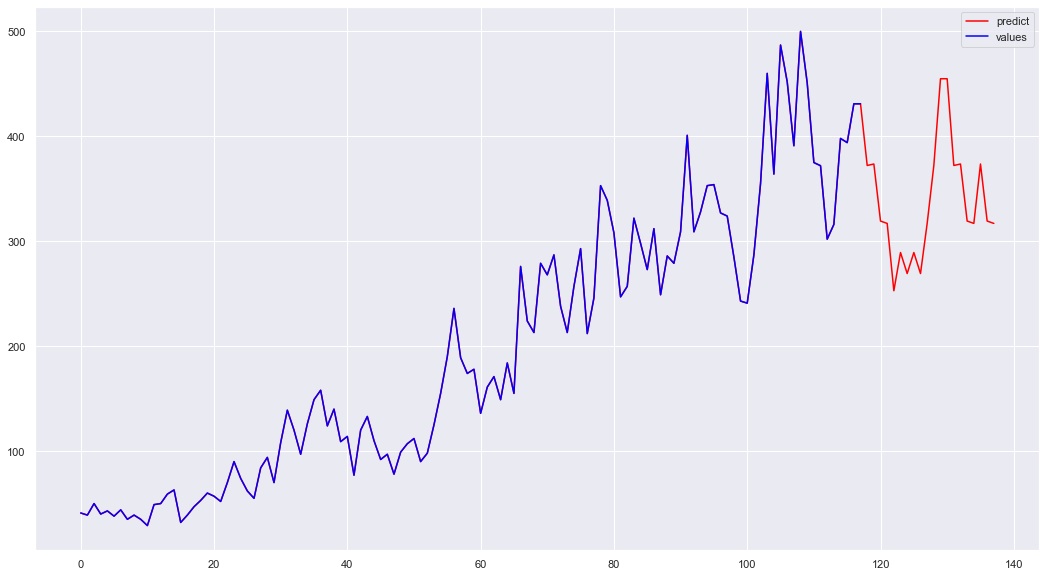

In [151]:
plt.figure(figsize=(18, 10))
plt.plot(predict_series, color='red', label='predict')
plt.plot(values, color='blue', label='values')

plt.legend()